# Principal Component Analysis (PCA) on the MNIST Handwritten Digits Dataset using Library

In [53]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [55]:
raw_data_train= pd.read_csv('data/mnist_train.csv')
raw_data_test= pd.read_csv('data/mnist_test.csv')

X= raw_data_train.drop(columns=['label'])
y= raw_data_train['label']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


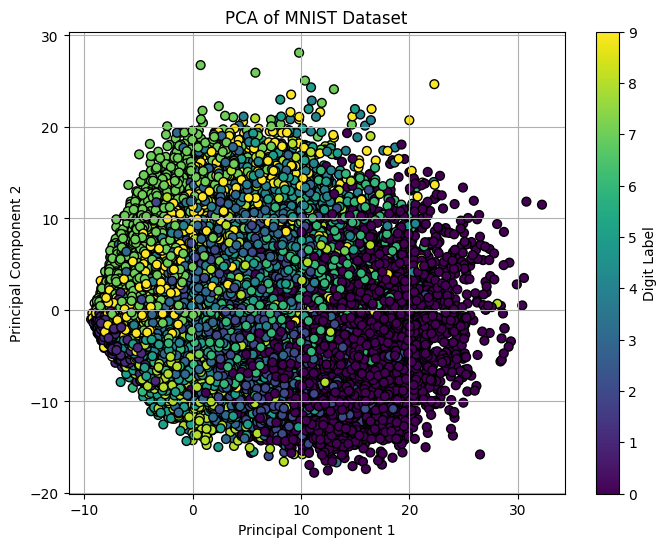

Explained variance ratio: [0.05646717 0.04078272]


In [56]:
# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.title('PCA of MNIST Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Digit Label')
plt.grid()
plt.show()

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

k=2, MSE: 0.8256, RMSE: 0.8667
k=2, R² score: 0.1502
k=3, MSE: 0.7914, RMSE: 0.8475
k=3, R² score: 0.1831
k=4, MSE: 0.7650, RMSE: 0.8324
k=4, R² score: 0.2082
k=5, MSE: 0.7420, RMSE: 0.8189
k=5, R² score: 0.2313
k=10, MSE: 0.6615, RMSE: 0.7698
k=10, R² score: 0.3054
k=20, MSE: 0.5664, RMSE: 0.7068
k=20, R² score: 0.4004
k=30, MSE: 0.5012, RMSE: 0.6611
k=30, R² score: 0.4592
k=40, MSE: 0.4514, RMSE: 0.6247
k=40, R² score: 0.5091
k=50, MSE: 0.4106, RMSE: 0.5948
k=50, R² score: 0.5499


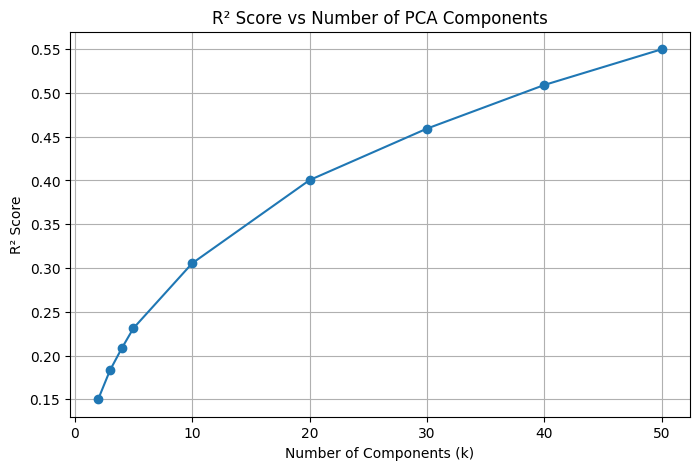

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different k values
k_values=[2, 3, 4, 5, 10, 20, 30, 40, 50]
r2_scores = []

for k in k_values:
    # Apply PCA
    pca = PCA(n_components=k)
    X_reduced = pca.fit_transform(X_scaled)
    
    # Reconstruct the data
    X_reconstructed = pca.inverse_transform(X_reduced)
    
    # Compute R² score
    r2 = r2_score(X_scaled, X_reconstructed)
    r2_scores.append(r2)
    mse = mean_squared_error(X_scaled, X_reconstructed)
    rmse = root_mean_squared_error(X_scaled, X_reconstructed)
    print(f"k={k}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")
    # Print R² scor
    print(f"k={k}, R² score: {r2:.4f}")

# Plotting R² scores vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, r2_scores, marker='o', linestyle='-')
plt.title("R² Score vs Number of PCA Components")
plt.xlabel("Number of Components (k)")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()
